## Linear Regression with Scikit Learn 



In [11]:
# importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 13
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [13]:
# Loading the data from the file insurance.csv into Pandas Dataframe
medical_df = pd.read_csv("insurance.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
#Analyzing the data
medical_df.info()
# does not contain any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Correlation between the columns

In [16]:
# correlation between the columns
medical_df.corr()
# shows the correlation only between the numeric columns but not the categorical cloumns
# change the categorical data into 1s and 0s using one-hot encoding




,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


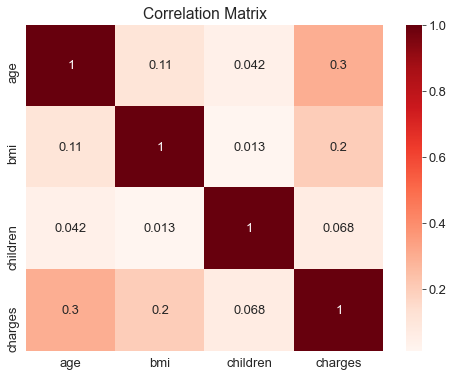

In [17]:
sns.heatmap(medical_df.corr(),cmap ="Reds",annot=True)
plt.title("Correlation Matrix");

visualizing the data

Charges

In [18]:
fig = px.histogram(medical_df, x="charges", marginal = "box",color ="smoker",color_discrete_sequence=["green","grey"],title = "Annual Medical Charges" )
fig.update_layout(bargap=0.1)
fig.show()

Age vs. Charges

In [19]:
fig = px.scatter(medical_df, x="age",y="charges",color="smoker",opacity =0.8, hover_data = ["sex"],title="Age vs. Charges")
fig.update_traces(marker_size=5)
fig.show()


BMI and Charges

In [20]:
fig = px.scatter(medical_df,x ="bmi",y ="charges",color="smoker",opacity = 0.8,hover_data =["sex"], title = "BMI vs. Charges")
fig.update_traces(marker_size = 5)
fig.show()

Region and charges

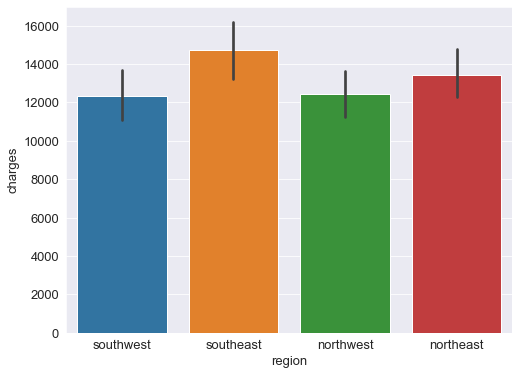

In [21]:
sns.barplot(data =  medical_df,x="region",y="charges");

Input  data and Target data coulmns

In [22]:
# split the  input data into numeric columns and categorical columns
input_cols = medical_df.columns[0:6]
inputs_df=  medical_df[input_cols].copy()
inputs_df

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [23]:
target_cols = medical_df.columns[6:]
target_df = medical_df[target_cols]
target_df

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Splitting the input data columns into numeric and categorical data columns

In [24]:
numeric_cols = inputs_df.select_dtypes(include = ["int64","float64"]).columns.tolist()
numeric_cols

['age', 'bmi', 'children']

In [25]:
#cat_cols=inputs_df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = ["region"]

print(cat_cols)
#smoker column
smokervalue = {"no": 0, "yes":1}
smoker_numeric = inputs_df.smoker.map(smokervalue )

print()

#sex column
sex_values={ "female":1,"male":0}
sex_numeric = inputs_df.sex.map(sex_values)







['region']



In [26]:
#encoding the categorical columns
inputs_df[cat_cols].nunique()


region    4
dtype: int64

Encoding the categorical columns into 1s and 0s using One-Hot encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,handle_unknown="ignore")
encoder.fit(inputs_df[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[cat_cols])
inputs_df["sex_numeric"]=sex_numeric
inputs_df["smoker_numeric"]= smoker_numeric
encoded_cols = ['region_northeast','region_northwest','region_southeast','region_southwest','sex_numeric','smoker_numeric']
print(encoded_cols)




['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_numeric', 'smoker_numeric']


In [28]:
# scaling the numeric columns to range(0,1)
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,age,bmi,children
min,18.0,15.96,0.0
max,64.0,53.13,5.0


Scaling the numeric column data into the range(0,1) so that different ranges of numeric data cannot interrupt the output

In [29]:
# using MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])
inputs_df


,age,sex,bmi,children,smoker,region,region_northeast,region_northwest,region_southeast,region_southwest,sex_numeric,smoker_numeric
0,0.021739,female,0.321227,0.0,yes,southwest,0.0,0.0,0.0,1.0,1,1
1,0.000000,male,0.479150,0.2,no,southeast,0.0,0.0,1.0,0.0,0,0
2,0.217391,male,0.458434,0.6,no,southeast,0.0,0.0,1.0,0.0,0,0
3,0.326087,male,0.181464,0.0,no,northwest,0.0,1.0,0.0,0.0,0,0
4,0.304348,male,0.347592,0.0,no,northwest,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,0.0,1.0,0.0,0.0,0,0
1334,0.000000,female,0.429379,0.0,no,northeast,1.0,0.0,0.0,0.0,1,0
1335,0.000000,female,0.562012,0.0,no,southeast,0.0,0.0,1.0,0.0,1,0
1336,0.065217,female,0.264730,0.0,no,southwest,0.0,0.0,0.0,1.0,1,0


complete input data has been set to the range(0,1)

## Splitting the input and target data into test and train sets

In [30]:
#training and test set
from sklearn.model_selection import train_test_split
train_inputs, test_inputs,train_targets,test_targets = train_test_split(inputs_df[numeric_cols + encoded_cols],target_df, test_size=0.25, random_state=42)


In [31]:
train_inputs 

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_numeric,smoker_numeric
693,0.130435,0.207022,0.0,0.0,1.0,0.0,0.0,0,0
1297,0.217391,0.283831,0.4,0.0,0.0,1.0,0.0,1,0
634,0.717391,0.638687,0.2,0.0,0.0,0.0,1.0,0,0
1022,0.630435,0.541297,0.2,0.0,0.0,1.0,0.0,0,1
178,0.608696,0.348130,0.4,0.0,0.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...
1095,0.000000,0.414044,0.8,1.0,0.0,0.0,0.0,1,0
1130,0.456522,0.212806,1.0,0.0,0.0,1.0,0.0,1,0
1294,0.869565,0.247915,0.0,1.0,0.0,0.0,0.0,0,0
860,0.413043,0.851224,0.4,0.0,0.0,0.0,1.0,1,1


In [32]:
train_targets

,charges
693,2352.96845
1297,4340.44090
634,9391.34600
1022,42211.13820
178,8823.27900
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


generate and train the model

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_inputs,train_targets)


LinearRegression()

In [34]:
predictions = model.predict(train_inputs)
predictions[0:10]

array([[ 1824.],
       [ 4000.],
       [14336.],
       [35520.],
       [ 9664.],
       [12800.],
       [ 5280.],
       [ 4992.],
       [ 3968.],
       [ 2720.]])

In [35]:
train_targets[0:10]

,charges
693,2352.96845
1297,4340.44090
634,9391.34600
1022,42211.13820
178,8823.27900
287,14256.19280
1290,7133.90250
1113,5312.16985
294,3906.12700
471,2203.47185


computing the loss using ROOT MEAN SQUARED ERROR method

In [36]:
# Root Mean Squared Error
def rmse(target_data,predicted_data):
    return np.sqrt(np.mean(np.square(target_data-predicted_data)))

In [37]:
loss = rmse(train_targets,predictions)
print(loss)

charges    6084.012797
dtype: float64


In [38]:
model.coef_

array([[ 1.19839864e+04,  1.27678311e+04,  2.12885015e+03,
         1.62737959e+17,  1.62737959e+17,  1.62737959e+17,
         1.62737959e+17, -6.40507002e+01,  2.36606691e+04]])

In [39]:
model.intercept_

array([-1.62737959e+17])

In [40]:
weights_df = pd.DataFrame({
    "features" : np.append(train_inputs.columns,1),
    "weights":np.append(model.coef_,model.intercept_)
})
weights_df

,features,weights
0,age,1.198399e+04
1,bmi,1.276783e+04
2,children,2.128850e+03
3,region_northeast,1.627380e+17
4,region_northwest,1.627380e+17
5,region_southeast,1.627380e+17
6,region_southwest,1.627380e+17
7,sex_numeric,-6.405070e+01
8,smoker_numeric,2.366067e+04
9,1,-1.627380e+17


predicting using test set

In [41]:
test_predictions = model.predict(test_inputs)
test_predictions[0:10]

array([[ 8896.],
       [ 7072.],
       [36960.],
       [ 9568.],
       [27008.],
       [11008.],
       [   96.],
       [17152.],
       [  928.],
       [11360.]])

In [42]:
loss1 = rmse(test_targets,test_predictions)
loss1

charges    5922.631837
dtype: float64

In [43]:
import joblib

In [44]:
insurance_predictor = {
    'model': model,
    
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
    'cat_cols': cat_cols,
    'encoded_cols': encoded_cols
}

In [45]:
joblib.dump(insurance_predictor,"insurance_predictor.joblib")

['insurance_predictor.joblib']

predict using new data

In [46]:

new_customers = [[28,30,2,1,0,0,1,0,0,0,0]]
scaler.transform([[28,30,2]])




array([[0.2173913 , 0.37772397, 0.4       ]])

In [47]:
model.predict([[0.2173913 , 0.37772397, 0.4,1,0,0,0,1,0]])


array([[6144.]])

## Can use the model by importing  joblib  without retraining 

In [48]:
import joblib

In [49]:
new = joblib.load("insurance_predictor.joblib")

In [50]:
k=new["model"]

In [51]:
k.predict([[0.2173913 , 0.37772397, 0.4,1,0,0,0,1,0]])

array([[6144.]])